In [114]:
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt


In [115]:
voter_issues_by_year = {
    2016: {
        "Economy": {"Average": 84, "Democrat": 80, "Republican": 90},
        "Terrorism": {"Average": 80, "Democrat": 74, "Republican": 89},
        "Foreign Policy": {"Average": 75, "Democrat": 73, "Republican": 79},
        "Healthcare": {"Average": 74, "Democrat": 77, "Republican": 71},
        "Gun Policy": {"Average": 72, "Democrat": 74, "Republican": 71},
        "Immigration": {"Average": 70, "Democrat": 65, "Republican": 79},
        "Source": "Pew Research, June 15–26, 2016"
    },
    2020: {
        "Economy": {"Average": 79, "Democrat": 72, "Republican": 88},
        "Healthcare": {"Average": 68, "Democrat": 84, "Republican": 48},
        "SCOTUS": {"Average": 64, "Democrat": 66, "Republican": 61},
        "Covid Outbreak": {"Average": 62, "Democrat": 82, "Republican": 39},
        "Violent Crime": {"Average": 59, "Democrat": 46, "Republican": 74},
        "Foreign Policy": {"Average": 57, "Democrat": 57, "Republican": 57},
        "Gun Policy": {"Average": 55, "Democrat": 50, "Republican": 60},
        "Immigration": {"Average": 52, "Democrat": 46, "Republican": 61},
        "Source": "Pew Research, July 27–Aug 2, 2020"
    },
    2024: {
        "Economy": {"Average": 81, "Democrat": 68, "Republican": 93},
        "Healthcare": {"Average": 65, "Democrat": 76, "Republican": 55},
        "SCOTUS": {"Average": 63, "Democrat": 73, "Republican": 54},
        "Foreign Policy": {"Average": 62, "Democrat": 54, "Republican": 70},
        "Violent Crime": {"Average": 61, "Democrat": 46, "Republican": 76},
        "Immigration": {"Average": 61, "Democrat": 39, "Republican": 82},
        "Gun Policy": {"Average": 56, "Democrat": 59, "Republican": 53},
        "Source": "Pew Research, 2024 (date unspecified)"
    }
}
rows = []
for year, issues in voter_issues_by_year.items():
    for issue, values in issues.items():
        if issue != "Source":
            row = {"Year": year, "Issue": issue}
            row.update(values)
            rows.append(row)

# Create the DataFrame
df = pd.DataFrame(rows)

# Optional: sort for neatness
df = df.sort_values(by=["Year", "Issue"]).reset_index(drop=True)
# df= df.set_index('Year')

print(rows)

[{'Year': 2016, 'Issue': 'Economy', 'Average': 84, 'Democrat': 80, 'Republican': 90}, {'Year': 2016, 'Issue': 'Terrorism', 'Average': 80, 'Democrat': 74, 'Republican': 89}, {'Year': 2016, 'Issue': 'Foreign Policy', 'Average': 75, 'Democrat': 73, 'Republican': 79}, {'Year': 2016, 'Issue': 'Healthcare', 'Average': 74, 'Democrat': 77, 'Republican': 71}, {'Year': 2016, 'Issue': 'Gun Policy', 'Average': 72, 'Democrat': 74, 'Republican': 71}, {'Year': 2016, 'Issue': 'Immigration', 'Average': 70, 'Democrat': 65, 'Republican': 79}, {'Year': 2020, 'Issue': 'Economy', 'Average': 79, 'Democrat': 72, 'Republican': 88}, {'Year': 2020, 'Issue': 'Healthcare', 'Average': 68, 'Democrat': 84, 'Republican': 48}, {'Year': 2020, 'Issue': 'SCOTUS', 'Average': 64, 'Democrat': 66, 'Republican': 61}, {'Year': 2020, 'Issue': 'Covid Outbreak', 'Average': 62, 'Democrat': 82, 'Republican': 39}, {'Year': 2020, 'Issue': 'Violent Crime', 'Average': 59, 'Democrat': 46, 'Republican': 74}, {'Year': 2020, 'Issue': 'Forei

In [ ]:

election_data = {
    2016: {
        "turnout": 136_787_187,
        "voting_age_population": 245_502_000,
        "voter_eligible_population": 230_931_921,
        "voter_registration": 157_596_000,
        "turnout_percent_of_total_population": 55.7,
        "turnout_percent_of_eligible": 59.2
    },
    2020: {
        "turnout": 158_481_688,
        "voting_age_population": 252_274_000,
        "voter_eligible_population": 242_690_810,
        "voter_registration": 168_308_000,
        "turnout_percent_of_total_population": 62.8,
        "turnout_percent_of_eligible": 65.3
    },
    2024: {
        "turnout": 155_201_157,
        "voting_age_population": 266_978_268,
        "voter_eligible_population": 244_666_890,
        "voter_registration": 168_308_000,  # Not provided
        "turnout_percent_of_total_population": 58.2,
        "turnout_percent_of_eligible": 63.5
    }
}



<Figure size 1000x600 with 0 Axes>

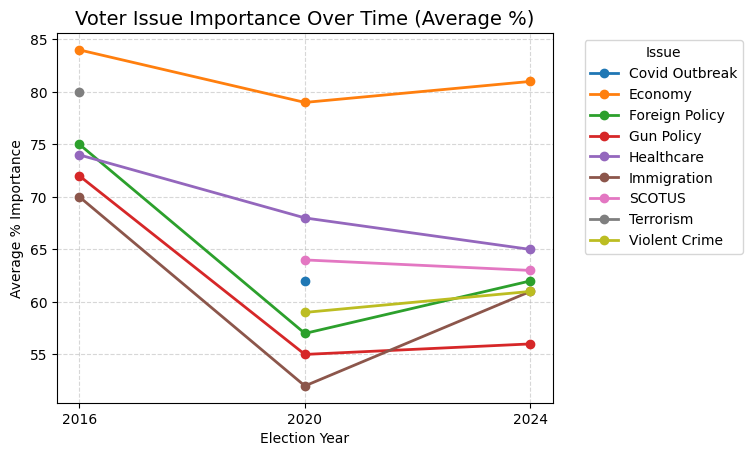

<Figure size 800x500 with 0 Axes>

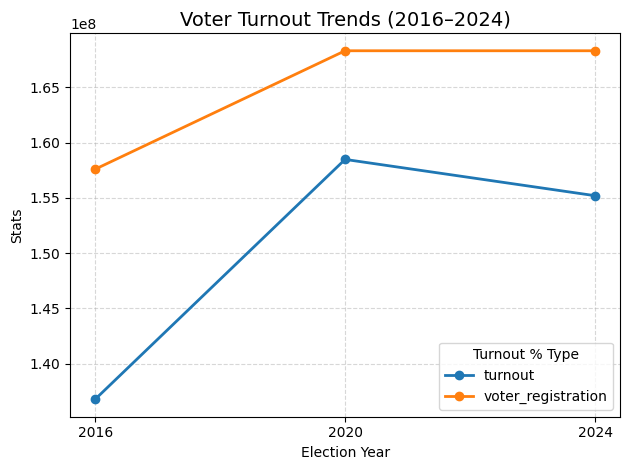

In [117]:
datadf = pd.DataFrame(election_data).T
datadf.index.name = 'Year'
# Step 2: Pivot the table for plotting
# df.set_index('Year')
# Step 3: Plot
pivot_df = df.pivot(index='Year', columns='Issue', values='Average')
pivot_df.dropna()


plt.figure(figsize=(10, 6))
pivot_df.plot( marker='o', linewidth=2)
plt.title("Voter Issue Importance Over Time (Average %)", fontsize=14)
plt.ylabel("Average % Importance")
plt.xlabel("Election Year")
plt.xticks([2016, 2020, 2024])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Issue", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()

plt.figure(figsize=(8, 5))
datadf[['turnout', 'voter_registration']].plot(marker='o', linewidth=2)
plt.title("Voter Turnout Trends (2016–2024)", fontsize=14)
plt.ylabel("Stats")
plt.xlabel("Election Year")
plt.xticks([2016, 2020, 2024])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Turnout % Type")
plt.tight_layout()

plt.show()

In [125]:
datadf.head()
datadf.to_latex('voter_turnout.tex', index=True, float_format="%.2f", column_format='lcccccc', escape=False)

In [119]:
pivot_df.head(10)

Issue,Covid Outbreak,Economy,Foreign Policy,Gun Policy,Healthcare,Immigration,SCOTUS,Terrorism,Violent Crime
Year,,,,,,,,,
2016,NaN,84.0,75.0,72.0,74.0,70.0,NaN,80.0,NaN
2020,62.0,79.0,57.0,55.0,68.0,52.0,64.0,NaN,59.0
2024,NaN,81.0,62.0,56.0,65.0,61.0,63.0,NaN,61.0


In [124]:
import pandas as pd

# Re-define the original data after code state reset
voter_issues_by_year = {
    2016: {
        "Economy": {"Average": 84, "Democrat": 80, "Republican": 90},
        "Terrorism": {"Average": 80, "Democrat": 74, "Republican": 89},
        "Foreign Policy": {"Average": 75, "Democrat": 73, "Republican": 79},
        "Healthcare": {"Average": 74, "Democrat": 77, "Republican": 71},
        "Gun Policy": {"Average": 72, "Democrat": 74, "Republican": 71},
        "Immigration": {"Average": 70, "Democrat": 65, "Republican": 79},
    },
    2020: {
        "Economy": {"Average": 79, "Democrat": 72, "Republican": 88},
        "Healthcare": {"Average": 68, "Democrat": 84, "Republican": 48},
        "SCOTUS": {"Average": 64, "Democrat": 66, "Republican": 61},
        "Covid Outbreak": {"Average": 62, "Democrat": 82, "Republican": 39},
        "Violent Crime": {"Average": 59, "Democrat": 46, "Republican": 74},
        "Foreign Policy": {"Average": 57, "Democrat": 57, "Republican": 57},
        "Gun Policy": {"Average": 55, "Democrat": 50, "Republican": 60},
        "Immigration": {"Average": 52, "Democrat": 46, "Republican": 61},
    },
    2024: {
        "Economy": {"Average": 81, "Democrat": 68, "Republican": 93},
        "Healthcare": {"Average": 65, "Democrat": 76, "Republican": 55},
        "SCOTUS": {"Average": 63, "Democrat": 73, "Republican": 54},
        "Foreign Policy": {"Average": 62, "Democrat": 54, "Republican": 70},
        "Violent Crime": {"Average": 61, "Democrat": 46, "Republican": 76},
        "Immigration": {"Average": 61, "Democrat": 39, "Republican": 82},
        "Gun Policy": {"Average": 56, "Democrat": 59, "Republican": 53},
    }
}

# Get all unique issues across years
all_issues = set()
for year_data in voter_issues_by_year.values():
    all_issues.update(year_data.keys())
all_issues = sorted(all_issues)

# Build multi-level columns
multi_columns = pd.MultiIndex.from_product(
    [[2016, 2020, 2024], ['Average', 'Democrat %', 'Republican %']],
    names=['Year', 'Metric']
)

# Build table rows
table_data = []
for issue in all_issues:
    row = []
    for year in [2016, 2020, 2024]:
        issue_data = voter_issues_by_year.get(year, {}).get(issue)
        if issue_data:
            row.extend([issue_data['Average'], issue_data['Democrat'], issue_data['Republican']])
        else:
            row.extend([None, None, None])
    table_data.append(row)

# Create DataFrame
df_table = pd.DataFrame(table_data, index=all_issues, columns=multi_columns)
df_table.index.name = "Issue"
df_table.reset_index(inplace=True)

df_table.head(10)

df_table.to_latex(
    "voter_issues_table.tex",
    index=False,
    float_format="%.2f",
    column_format="|l|c|c|c|c|c|c|c|c|c|",
    escape=False,
    caption="Voter Issues by Year and Party Affiliation",
    label="tab:voter_issues",
    multirow=True,
    multicolumn=True,
)